<a href="https://colab.research.google.com/github/Michaeljo112/BP/blob/main/indice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pyreadr

# Datos

In [2]:
# Leer parquetes/librerías
import pandas as pd
from pandas.api.types import is_numeric_dtype
import pyreadr

In [3]:
# Subí una copia de los datos a mi drive, con estas líneas se puede leer
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Ruta al archivo en tu Google Drive
ruta_archivo = '/content/drive/My Drive/prueba_tecnica/FRI.RData'

# Leer el archivo CSV en un DataFrame
data = pyreadr.read_r(ruta_archivo)
data = data['FRI']
data

,Frecuencia,Transaccionalidad,Ingresos
0,5.0,121.36,1918.00
1,1.0,0.02,2000.00
2,36.0,6786.87,860.69
3,8.0,62.87,1354.39
4,12.0,1978.01,1586.03
...,...,...,...
4995,10.0,5256.06,158.00
4996,11.0,1362.99,732.10
4997,35.0,1876.16,807.63
4998,2.0,250.54,1360.00


In [5]:
# Analicemos si hay nulos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frecuencia         5000 non-null   float64
 1   Transaccionalidad  5000 non-null   float64
 2   Ingresos           5000 non-null   float64
dtypes: float64(3)
memory usage: 117.3 KB


In [6]:
# Analicemos la distribución de los datos.
data.describe()

,Frecuencia,Transaccionalidad,Ingresos
count,5000.000000,5000.000000,5.000000e+03
mean,13.883000,2578.323684,1.270395e+03
std,12.653036,6953.011936,1.485151e+04
min,1.000000,0.010000,0.000000e+00
25%,4.000000,248.235000,5.597650e+02
50%,11.000000,1521.285000,8.491500e+02
75%,20.000000,2461.582500,1.200000e+03
max,148.000000,190517.800000,1.036000e+06


# Razonamiento

Pensemos cómo se crea un índice. Si tengo un conjunto de datos a los que puedo reconocer como los de la variable X, puedo crear su índice como $\frac{X - X_{min}}{X_{max} - X_{min}}$. Para ser breves, llamemos de aquí en adelante a la anterior razón de diferencias $X_{index}$.<br>
<br>
**Apéndice**. (Opcional). (Es una nota para facilitar el razonamiento de la consytrucción del índice). <br>
Cabe la pregunta: ¿por qué es así? ¿Qué significa esta ecuación? Veamos.<br>
Consideremos el valor más grande de X o $X_{max} = \max(X)$. El índice para este valor es $\frac{X_{max} - X_{min}}{X_{max} - X_{min}} = 1$. (Si pensamos en un <i>ranking</i>, por ejemplo, podemos hacer que este uno equivalga a 100).<br>
También pensemos en el mínimo de X, su índice será $\frac{X_{min} - X_{min}}{X_{min} - X_{min}} = 0$. (En una escala de 100, 0 sigue siendo el valor mínimo).<br>
Ahora, hay una larga documentación para construir índices en las que no repararé en este cuaderno. Siguiendo los consejos estandar, y simplificándolos por el tiempo me concentraré en:

1. En primer lugar, en seleccionar ítems que tengan validez aparente.
2. En segundo lugar, en la unidimensionalidad.
3. En tercer lugar, en decidir el grado de generalidad o especificidad de las variables.
4. Por último, en la cantidad de varianza que aporta cada elemento del índice.


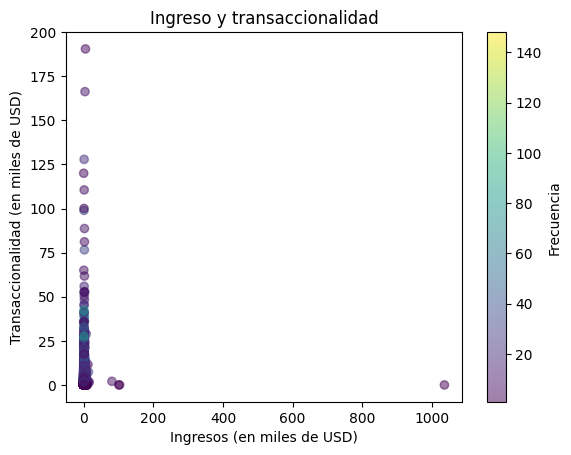

In [7]:
# Estudiemos, entonces, las relaciones de las variables
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Dibujar relación transacciones e ingreso
plt.scatter(x=data["Ingresos"]/1e3,y=data["Transaccionalidad"]/1e3, c=data["Frecuencia"], alpha=0.5)
plt.colorbar(label='Frecuencia')
plt.title("Ingreso y transaccionalidad")
plt.xlabel("Ingresos (en miles de USD)")
plt.ylabel("Transaccionalidad (en miles de USD)")
plt.show()

>> Método por cuartiles
Datos originales:
 5000
Datos sin outliers:
 4646


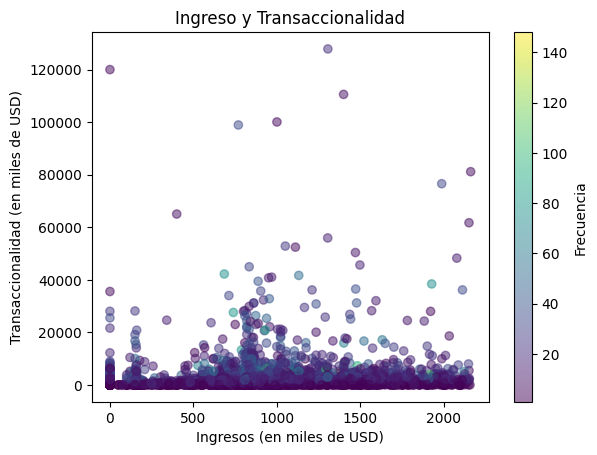

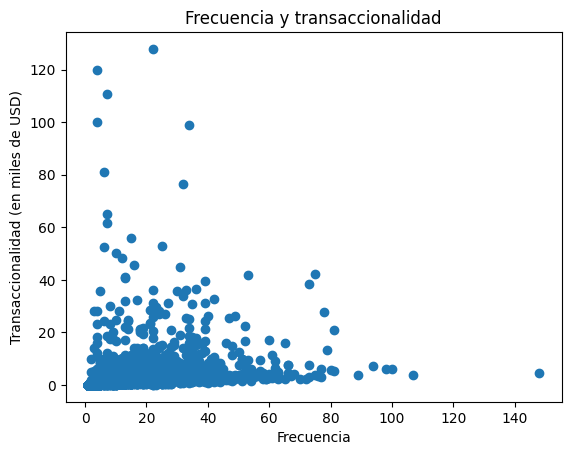

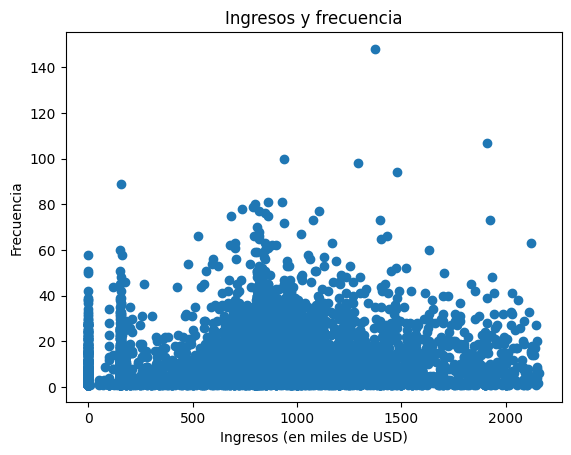

In [8]:
# Quitemos valores extremos por método de cuartiles
import numpy as np
%matplotlib inline

# Calcular el primer y tercer cuartil (Q1 y Q3)
Q1 = np.percentile(data["Ingresos"], 25)
Q3 = np.percentile(data["Ingresos"], 75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores que estén dentro del rango establecido
filtered_data = data[(data["Ingresos"] >= lower_bound) & (data["Ingresos"] <= upper_bound) ]

# Los valores atípicos han sido eliminados
print(">> Método por cuartiles")
print("Datos originales:\n", data.shape[0])
print("Datos sin outliers:\n", filtered_data.shape[0])

# Dibujar relación transacciones e ingreso
plt.scatter(x=filtered_data["Ingresos"],y=filtered_data["Transaccionalidad"], c=filtered_data["Frecuencia"], alpha=0.5)
plt.colorbar(label='Frecuencia')
plt.title("Ingreso y Transaccionalidad")
plt.xlabel("Ingresos (en miles de USD)")
plt.ylabel("Transaccionalidad (en miles de USD)")
plt.show()

# Dibujar relación transacciones e ingreso
plt.scatter(x=filtered_data["Frecuencia"],y=filtered_data["Transaccionalidad"]/1e3)
plt.title("Frecuencia y transaccionalidad")
plt.xlabel("Frecuencia")
plt.ylabel("Transaccionalidad (en miles de USD)")
plt.show()

# Dibujar relación transacciones e ingreso
plt.scatter(x=filtered_data["Ingresos"],y=filtered_data["Frecuencia"])
plt.title("Ingresos y frecuencia")
plt.xlabel("Ingresos (en miles de USD)")
plt.ylabel("Frecuencia")
plt.show()

>> Método por desviaciones estandar
Datos originales:
 5000

DataFrame filtrado sin outliers:
 4996


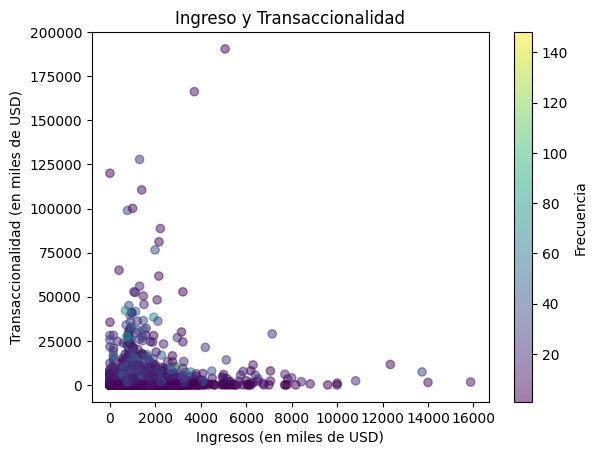

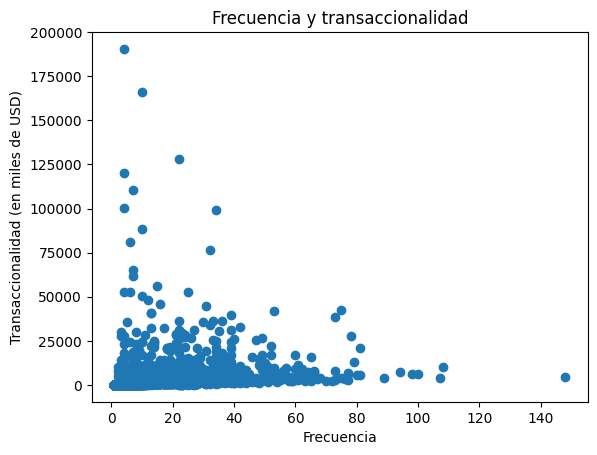

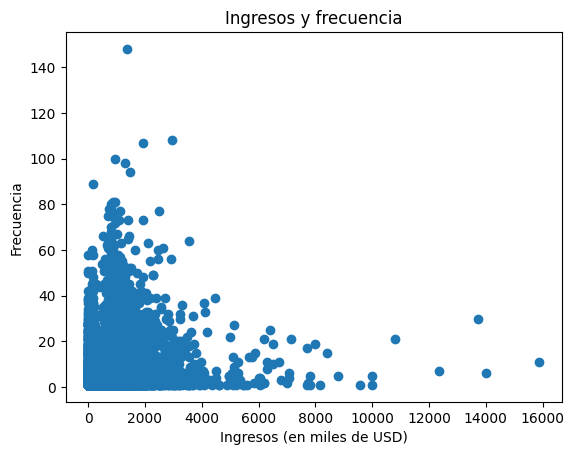

In [9]:
# Eliminemos outlier por método de desviaciones
import pandas as pd
import numpy as np

# Calcular la media y la desviación estándar de la columna 'Columna_A'
mean = data['Ingresos'].mean()
std_dev = data['Ingresos'].std()

# Definir el umbral para identificar outliers (por ejemplo, 2 desviaciones estándar)
threshold = 2  # Puedes ajustar este valor según tus necesidades

# Filtrar los valores que están dentro del rango establecido
filtered_df = data[~((data['Ingresos'] - mean).abs() > threshold * std_dev)]

# Los valores atípicos han sido eliminados
print(">> Método por desviaciones estandar")
print("Datos originales:\n", data.shape[0])
print("\nDataFrame filtrado sin outliers:\n", filtered_df.shape[0])

# Dibujar relación transacciones e ingreso
plt.scatter(x=filtered_df["Ingresos"],y=filtered_df["Transaccionalidad"], c=filtered_df["Frecuencia"], alpha=0.5) #, s=data["Frecuencia"]
plt.colorbar(label='Frecuencia')
plt.title("Ingreso y Transaccionalidad")
plt.xlabel("Ingresos (en miles de USD)")
plt.ylabel("Transaccionalidad (en miles de USD)")
plt.show()

# Dibujar relación transacciones e ingreso
plt.scatter(x=filtered_df["Frecuencia"],y=filtered_df["Transaccionalidad"]) #, s=data["Frecuencia"]
plt.title("Frecuencia y transaccionalidad")
plt.xlabel("Frecuencia")
plt.ylabel("Transaccionalidad (en miles de USD)")
plt.show()

# Dibujar relación transacciones e ingreso
plt.scatter(x=filtered_df["Ingresos"],y=filtered_df["Frecuencia"])
plt.title("Ingresos y frecuencia")
plt.xlabel("Ingresos (en miles de USD)")
plt.ylabel("Frecuencia")
plt.show()

No hay una relación aparente.

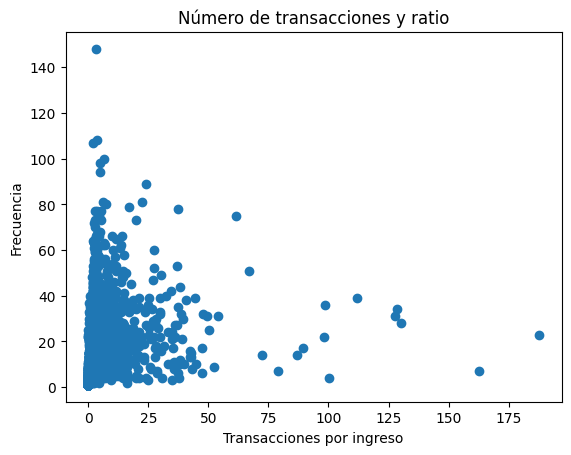

In [10]:
# Estudiemos ahora el rataio Transaccionalidad/Ingresos y el número de transacciones
data["TransIngreso"] = data['Transaccionalidad']/data['Ingresos']

# Dibujar relación transacciones e ingreso
plt.scatter(x=data["TransIngreso"], y=data["Frecuencia"])
plt.xlabel("Transacciones por ingreso")
plt.ylabel("Frecuencia")
plt.title("Número de transacciones y ratio")
plt.show()

# Índice
**Definición del índice**.<br>
Para empezar, definiremos la variable NTI que será igual al producto del cociente entre transaccionalidad e ingresos y el número de transacciones. Formalmente esto es: $NTI = n\frac{T}{Y}$.<br>
Nuestro índice será, entonces, una estandarización del NTI. Como ecuación: $NTI_{index} = \frac{log(NTI) - log(NTI_{min})}{log(NTI_{max}) - log(NTI_{min})}$ [a].<br>
**Cambios por variable**<br>
Para obtener los cambios por variables podemos derivar el índice respecto a la variable de interés. Hagamos eso, para notar los cambios.<br>

1. $\frac{\partial{NTI}}{\partial{n}} = \frac{log(NTI) - log(NTI_{min})}{log(NTI_{max}) - log(NTI_{min})}*\frac{T}{Y} \iff \frac{\partial{NTI}}{\partial{n}} = NTI*\frac{T}{Y}$.
2. $\frac{\partial{NTI}}{\partial{T}} = \frac{log(NTI) - log(NTI_{min})}{log(NTI_{max}) - log(NTI_{min})}*\frac{n}{Y} \iff \frac{\partial{NTI}}{\partial{n}} = NTI*\frac{n}{Y}$.
3. $\frac{\partial{NTI}}{\partial{Y}} = \frac{log(NTI) - log(NTI_{min})}{log(NTI_{max}) - log(NTI_{min})}*-\frac{nT}{Y^2} \iff \frac{\partial{NTI}}{\partial{n}} = -NTI*\frac{nT}{Y^2}$.

Me ahorré el desarrollo de las derivadas porque es fin de este documento es, entiendo, empírico-prático.

In [11]:
import warnings
warnings.filterwarnings("ignore")

# Creemos una variable NTI
data["numTransIngreso"] = data['Transaccionalidad']/data['Ingresos']*data['Frecuencia']

# Si los ingresos son 0 no se puede obtener un NTI
df_noceros = data[data['Ingresos']!=0]

from math import log
import numpy as np

# Ahora definamos una función para calcularlo del índice NTI
def index_NTI(value):
  try:
    NTI_index = ( log(value) - log(min(df_noceros["numTransIngreso"])) )/( log(max(df_noceros["numTransIngreso"])) - log(min(df_noceros["numTransIngreso"])) )
    return(NTI_index)
  except ValueError:
    None

# Calcular índice y ordenar la tabla por índice
df_noceros['index_NTI'] = df_noceros['numTransIngreso'].apply(index_NTI)
df_noceros.sort_values(by='index_NTI', ascending=False)

,Frecuencia,Transaccionalidad,Ingresos,TransIngreso,numTransIngreso,index_NTI
4117,75.0,42227.97,684.77,6.166738e+01,4.625053e+03,1.000000
1962,34.0,98942.67,768.90,1.286808e+02,4.375147e+03,0.997880
3592,39.0,16763.67,150.00,1.117578e+02,4.358554e+03,0.997735
3685,23.0,28152.28,150.00,1.876819e+02,4.316683e+03,0.997367
3414,31.0,19138.09,150.00,1.275873e+02,3.955205e+03,0.994029
...,...,...,...,...,...,...
753,1.0,0.02,9587.00,2.086158e-06,2.086158e-06,0.178715
3018,1.0,0.02,10000.00,2.000000e-06,2.000000e-06,0.177105
1469,2.0,0.04,103070.00,3.880858e-07,7.761715e-07,0.140981
3672,1.0,0.03,100901.00,2.973211e-07,2.973211e-07,0.104360


No sobra comparar los resultados anteriores con los que se obtendrían para las tablas para quienes se eliminaron valores extremos por métodos de cuartiles y derviaciones.

In [12]:
# Cuartiles:

import warnings
warnings.filterwarnings("ignore")

# Creemos una variable que resuma las anteriores
filtered_data["TransIngreso"] = filtered_data['Transaccionalidad']/filtered_data['Ingresos']
filtered_data["numTransIngreso"] = filtered_data['Transaccionalidad']/filtered_data['Ingresos']*filtered_data['Frecuencia']

# Si los ingresos son 0 no se puede obtener un NTI
df_noceros_qrt = filtered_data[filtered_data['Ingresos']!=0]

from math import log
import numpy as np

# Ahora definamos una función para calcularlo
def index_NTI(value):
  try:
    NTI_index = ( log(value) - log(min(df_noceros["numTransIngreso"])) )/( log(max(df_noceros["numTransIngreso"])) - log(min(df_noceros["numTransIngreso"])) )
    return(NTI_index)
  except ValueError:
    None

# Calcular índice y ordenar
df_noceros_qrt['index_NTI'] = df_noceros_qrt['numTransIngreso'].apply(index_NTI)
df_noceros_qrt.sort_values(by='index_NTI', ascending=False)

,Frecuencia,Transaccionalidad,Ingresos,TransIngreso,numTransIngreso,index_NTI
4117,75.0,42227.97,684.77,61.667377,4625.053303,1.000000
1962,34.0,98942.67,768.90,128.680804,4375.147327,0.997880
3592,39.0,16763.67,150.00,111.757800,4358.554200,0.997735
3685,23.0,28152.28,150.00,187.681867,4316.682933,0.997367
3414,31.0,19138.09,150.00,127.587267,3955.205267,0.994029
...,...,...,...,...,...,...
2836,1.0,0.01,1200.00,0.000008,0.000008,0.231571
3838,1.0,0.01,1300.00,0.000008,0.000008,0.228516
784,1.0,0.01,1309.00,0.000008,0.000008,0.228253
3110,1.0,0.01,1720.00,0.000006,0.000006,0.217831


In [13]:
# Desviaciones

import warnings
warnings.filterwarnings("ignore")

# Creemos una variable que resuma las anteriores
filtered_df["TransIngreso"] = filtered_df['Transaccionalidad']/filtered_df['Ingresos']
filtered_df["numTransIngreso"] = filtered_df['Transaccionalidad']/filtered_df['Ingresos']*filtered_df['Frecuencia']

# Si los ingresos son 0 no se puede obtener un NTI
df_noceros_std = filtered_df[filtered_df['Ingresos']!=0]

from math import log
import numpy as np

# Ahora definamos una función para calcularlo
def index_NTI(value):
  try:
    NTI_index = ( log(value) - log(min(df_noceros["numTransIngreso"])) )/( log(max(df_noceros["numTransIngreso"])) - log(min(df_noceros["numTransIngreso"])) )
    return(NTI_index)
  except ValueError:
    None

# Calcular índice y ordenar
df_noceros_std['index_NTI'] = df_noceros_std['numTransIngreso'].apply(index_NTI)
df_noceros_std.sort_values(by='index_NTI', ascending=False)

,Frecuencia,Transaccionalidad,Ingresos,TransIngreso,numTransIngreso,index_NTI
4117,75.0,42227.97,684.77,61.667377,4625.053303,1.000000
1962,34.0,98942.67,768.90,128.680804,4375.147327,0.997880
3592,39.0,16763.67,150.00,111.757800,4358.554200,0.997735
3685,23.0,28152.28,150.00,187.681867,4316.682933,0.997367
3414,31.0,19138.09,150.00,127.587267,3955.205267,0.994029
...,...,...,...,...,...,...
4682,1.0,0.02,7690.00,0.000003,0.000003,0.187130
4430,1.0,0.02,7800.00,0.000003,0.000003,0.186588
3281,1.0,0.01,4600.00,0.000002,0.000002,0.180287
753,1.0,0.02,9587.00,0.000002,0.000002,0.178715


Número de intervalos según la regla de Sturges: 14


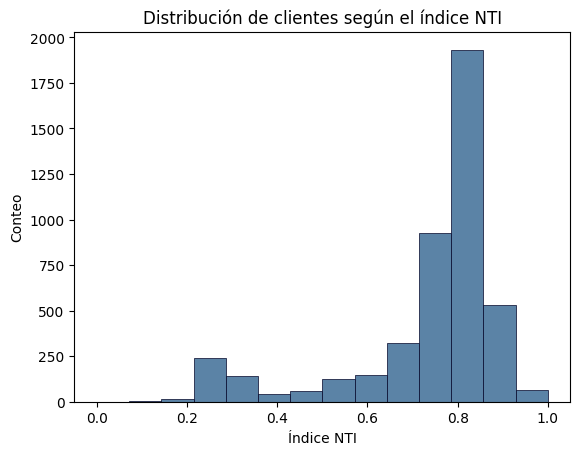

In [14]:
# Ahora estudiemos la distribución de los índices

# Calcular el número de intervalos usando la regla de Sturges
n = len(df_noceros["index_NTI"])
k_sturges = 1 + np.log2(n)
k_sturges = int(np.ceil(k_sturges))  # Redondear hacia arriba al número entero más cercano

print("Número de intervalos según la regla de Sturges:", k_sturges)

# Crear el histograma
plt.hist(df_noceros["index_NTI"], bins=k_sturges, facecolor = '#5B83A6', edgecolor='#010326', linewidth=0.5)
plt.xlabel('Índice NTI')
plt.ylabel('Conteo')
plt.title('Distribución de clientes según el índice NTI')

# Mostrar el histograma
plt.show()

Notemos que la medida es buena, en realidad si uno lo piensa mayores transacciones no significan necesariamente mayores montos mensuales transados. Por eso, hay menos índice que en el caso de menores montos acumulados al mes pero mayor movimiento. <br>
Nuestro índice se comporta bien.

In [15]:
df_noceros.sort_values(by='Frecuencia', ascending=False)

,Frecuencia,Transaccionalidad,Ingresos,TransIngreso,numTransIngreso,index_NTI
530,148.0,4640.90,1375.00,3.375200,499.529600,0.915061
1612,108.0,10438.11,2946.53,3.542509,382.591007,0.904883
3157,107.0,3841.14,1912.32,2.008628,214.923224,0.882874
2659,100.0,6237.50,937.00,6.656884,665.688367,0.926020
3189,98.0,6115.92,1293.70,4.727464,463.291459,0.912187
...,...,...,...,...,...,...
3114,1.0,0.02,800.00,0.000025,0.000025,0.273499
726,1.0,0.13,1900.00,0.000068,0.000068,0.311924
4394,1.0,0.02,551.59,0.000036,0.000036,0.287689
3110,1.0,0.01,1720.00,0.000006,0.000006,0.217831


Veamos cómo se comporta el índice para resumir la información de números de transacciones elevados.

In [16]:
df_noceros.sort_values(by='Transaccionalidad', ascending=False)

,Frecuencia,Transaccionalidad,Ingresos,TransIngreso,numTransIngreso,index_NTI
896,4.0,190517.80,5068.00,37.592305,150.369219,0.869242
1887,10.0,166303.85,3715.11,44.764179,447.641793,0.910876
4604,22.0,127886.16,1305.00,97.997057,2155.935264,0.970870
2094,7.0,110582.10,1399.05,79.040849,553.285944,0.918962
2352,4.0,100084.17,1000.00,100.084170,400.336680,0.906613
...,...,...,...,...,...,...
3525,1.0,0.01,1100.00,0.000009,0.000009,0.234892
294,1.0,0.01,150.00,0.000067,0.000067,0.310932
690,1.0,0.01,815.00,0.000012,0.000012,0.246336
2406,1.0,0.01,2200.00,0.000005,0.000005,0.208438


El índice asigna a un cliente con una transaccionalidad elevada, pero un valor de transacciones relativamente pequeño un índice menor que el de montos cercanos y número de transacciones.<br>
Hasta aquí hemos excluído ingresos de 0, pero estudiemos mejor a los clientes con ingresos de 0, para ajustar nuestro índice y generalizarlo.

In [17]:
# En realidad, estos tambiíen tienen frecuencias altas y una transaccionalidad considerable.
data[data['Ingresos']==0]

,Frecuencia,Transaccionalidad,Ingresos,TransIngreso,numTransIngreso
19,27.0,2136.91,0.0,inf,inf
21,1.0,0.14,0.0,inf,inf
30,19.0,2344.90,0.0,inf,inf
35,5.0,974.66,0.0,inf,inf
53,2.0,537.32,0.0,inf,inf
...,...,...,...,...,...
4955,1.0,0.09,0.0,inf,inf
4959,1.0,0.31,0.0,inf,inf
4982,2.0,19.71,0.0,inf,inf
4989,12.0,2133.33,0.0,inf,inf


El cociente Transaccionalidad/Ingresos no se puede calcular cuando Ingresos = 0. Pero pensemos en lo siguiente: si efectivamente estos clientes tienen ingresos de 0, puede decir que mueven dinero que tienen ahorrado, o que mueven dinero que reciben. En este caso, pensemos qué ocurre con nuestro índice si asignamos la relación Transaccionalidad/Ingresos un 1.

In [18]:
import warnings
warnings.filterwarnings("ignore")
from math import log
import numpy as np

# Función para realizar la división y manejar casos donde no se puede calcular
def numTransIngreso(n, T, Y):
    if (T != 0) & (Y == 0):
        return n*1  # Si el divisor es 0, asigna 1
    elif (T != 0) & (Y != 0):
        return n*T/Y
    else: # Nota para mí incluye caso (a == 0) & (b == 0)
        None

# Creemos una variable que resuma las anteriores
data['numTransIngreso'] = data.apply(lambda row: numTransIngreso(row["Frecuencia"], row['Transaccionalidad'], row['Ingresos']), axis=1)

# Ahora definamos una función para calcularlo
def index_NTI(value):
  try:
    NTI_index = ( log(value) - log(min(data["numTransIngreso"])) )/( log(max(data["numTransIngreso"])) - log(min(data["numTransIngreso"])) )
    return(NTI_index)
  except ValueError:
    None

print(f'NTI min: %s ' % min(data["numTransIngreso"]))
print(f'NTI max: %s' % max(data["numTransIngreso"]))

# Calcular índice y ordenar
data['index_NTI'] = data['numTransIngreso'].apply(index_NTI)
data.sort_values(by='index_NTI', ascending=False)

NTI min: 1.9305019305019306e-08 
NTI max: 4625.0533025687455


,Frecuencia,Transaccionalidad,Ingresos,TransIngreso,numTransIngreso,index_NTI
4117,75.0,42227.97,684.77,6.166738e+01,4.625053e+03,1.000000
1962,34.0,98942.67,768.90,1.286808e+02,4.375147e+03,0.997880
3592,39.0,16763.67,150.00,1.117578e+02,4.358554e+03,0.997735
3685,23.0,28152.28,150.00,1.876819e+02,4.316683e+03,0.997367
3414,31.0,19138.09,150.00,1.275873e+02,3.955205e+03,0.994029
...,...,...,...,...,...,...
753,1.0,0.02,9587.00,2.086158e-06,2.086158e-06,0.178715
3018,1.0,0.02,10000.00,2.000000e-06,2.000000e-06,0.177105
1469,2.0,0.04,103070.00,3.880858e-07,7.761715e-07,0.140981
3672,1.0,0.03,100901.00,2.973211e-07,2.973211e-07,0.104360


Veamos ahora qué ocurre para quienes tienen ingresos 0.

In [19]:
data.sort_values(by='Ingresos', ascending=True)

,Frecuencia,Transaccionalidad,Ingresos,TransIngreso,numTransIngreso,index_NTI
2499,2.0,19.71,0.00,inf,2.000000e+00,0.704372
1437,2.0,19.71,0.00,inf,2.000000e+00,0.704372
1440,11.0,1771.03,0.00,inf,1.100000e+01,0.769433
1442,2.0,1.39,0.00,inf,2.000000e+00,0.704372
1477,2.0,19.71,0.00,inf,2.000000e+00,0.704372
...,...,...,...,...,...,...
4276,11.0,1608.72,15879.02,1.013110e-01,1.114421e+00,0.682052
390,9.0,2051.96,81069.00,2.531128e-02,2.278015e-01,0.621461
3672,1.0,0.03,100901.00,2.973211e-07,2.973211e-07,0.104360
1469,2.0,0.04,103070.00,3.880858e-07,7.761715e-07,0.140981


No sobra examinar la frecuencia y el índice.

In [20]:
data.sort_values(by='Frecuencia', ascending=True)

,Frecuencia,Transaccionalidad,Ingresos,TransIngreso,numTransIngreso,index_NTI
4348,1.0,0.02,5100.00,0.000004,0.000004,0.202803
4124,1.0,0.02,720.58,0.000028,0.000028,0.277490
3080,1.0,0.03,0.00,inf,1.000000,0.677918
3082,1.0,0.02,100.00,0.000200,0.000200,0.352861
3089,1.0,0.03,1550.00,0.000019,0.000019,0.263732
...,...,...,...,...,...,...
3189,98.0,6115.92,1293.70,4.727464,463.291459,0.912187
2659,100.0,6237.50,937.00,6.656884,665.688367,0.926020
3157,107.0,3841.14,1912.32,2.008628,214.923224,0.882874
1612,108.0,10438.11,2946.53,3.542509,382.591007,0.904883


Pese a los ajustes. En realidad, hacer que Y = 1 si hay montos de Transaccionalidad hace que estemos examinando algo que carece de sentido analítico:
estamos multiplicando la frecuencia mensual de transacciones con el monto acumulado. Por tanto, esta idea no es conveniente.
<br><br>
**Conslusión**
En realidad analizar el comportamiento conjunto de las 3 variables implica relacionarlas. Es decir, encontrar un vínculo entre ellas. Al definir NTI = nT/Y estamos diciendo cuántas veces se meven k dólares por cada dolar del salario del cliente. Esto es una relación establecida. Por eso, vamos a restringirnos a usar la lógica de tener ingresos. Pues, sino podemos solo usar otra medida de T/n para estudiar el índice de transacciones medias.

# Clases NTI

A continuación creamos una clase para obtener la tabla de datos más una columna que contenga informaicón del Índice.

In [21]:
# Creemos una clase para obtener ambos índices, y uno tercero, el
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Finalmente, aquí defino una clase para obtener el índice NTI
# Creo una clase que recupera el ínice
class add_indice_NTI():
    def __init__(self, df, n, Y, T):
        self.df = df
        self.n = n
        self.Y = Y
        self.T = T

    def df_con_indice(self):
        df_con_indice = self.df
        # Quitar Nas de la variable del ingreso (aunque en nuestra base de datos no se presentan, es mejor generalizar crería yo)
        df_con_indice = df_con_indice.dropna(subset=[self.Y])
        # Si se agrega df_con_indice = df_con_indice[df_con_indice[self.Y] != 0]
        # el resultado devuelve una tabla sin ingresos 0

        # Ratio T/I
        def TransIngreso(T, Y):
          if Y != 0:
            return T/Y
          if Y == 0:
            return np.nan

        try:
          df_con_indice['TransIngreso'] = df_con_indice.apply(lambda row: TransIngreso(row[self.T], row[self.Y]), axis=1)
        except ValueError:
            print("n o T no son variables continuas")

        # nT/Y
        def numTransIngreso(n, T, Y):
          if Y != 0:
            return n*T/Y
          if Y == 0:
            return np.nan

        try:
          df_con_indice['numTransIngreso'] = df_con_indice.apply(lambda row: numTransIngreso(row[self.n], row[self.T], row[self.Y]), axis=1)
        except ValueError:
            print("n o T no son variables continuas")

        # Ahora definamos una función para calcular el NTI
        def index_NTI(value):
          try:
            NTI_index = ( log(value) - log(min(df_con_indice["numTransIngreso"])) )/( log(max(df_con_indice["numTransIngreso"])) - log(min(df_con_indice["numTransIngreso"])) )
            return(NTI_index)
          except ValueError:
            print("Se forazon NaN ara calculos que no puederon ser ejecutados.")
            None

        # Calcular índice y ordenar
        df_con_indice['index_NTI'] = df_con_indice['numTransIngreso'].apply(index_NTI)
        df_con_indice = df_con_indice.sort_values(by='index_NTI', ascending=False)

        return df_con_indice

In [22]:
# Usémosla

# Leamos los datos, una vez más, solo para mostrar cómo se haría en general el uso de la clase.
# Ruta al archivo en tu Google Drive
ruta_archivo = '/content/drive/My Drive/prueba_tecnica/FRI.RData'

# Leer el archivo CSV en un DataFrame
t = pyreadr.read_r(ruta_archivo)
t = t['FRI']
t

,Frecuencia,Transaccionalidad,Ingresos
0,5.0,121.36,1918.00
1,1.0,0.02,2000.00
2,36.0,6786.87,860.69
3,8.0,62.87,1354.39
4,12.0,1978.01,1586.03
...,...,...,...
4995,10.0,5256.06,158.00
4996,11.0,1362.99,732.10
4997,35.0,1876.16,807.63
4998,2.0,250.54,1360.00


In [23]:
# Instanciemos la clase
M = add_indice_NTI(df=t, n="Frecuencia", Y="Ingresos", T="Transaccionalidad")
df_NTI = M.df_con_indice()
df_NTI

,Frecuencia,Transaccionalidad,Ingresos,TransIngreso,numTransIngreso,index_NTI
4117,75.0,42227.97,684.77,61.667377,4625.053303,1.000000
1962,34.0,98942.67,768.90,128.680804,4375.147327,0.997880
3592,39.0,16763.67,150.00,111.757800,4358.554200,0.997735
3685,23.0,28152.28,150.00,187.681867,4316.682933,0.997367
3414,31.0,19138.09,150.00,127.587267,3955.205267,0.994029
...,...,...,...,...,...,...
4955,1.0,0.09,0.00,NaN,NaN,NaN
4959,1.0,0.31,0.00,NaN,NaN,NaN
4982,2.0,19.71,0.00,NaN,NaN,NaN
4989,12.0,2133.33,0.00,NaN,NaN,NaN


# Una alternativa

Vamos a crear un índice compuesto, para compararlo con el anterior.
Para ello, creemos índices de cada variable.<br><br>
$Y_{index} = \frac{log(Y) - log(Y_{min})}{log(Y_{max}) - log(Y_{min})}$ [b.1].<br><br>
$T_{index} = \frac{log(T) - log(T_{min})}{log(T_{max}) - log(T_{min})}$ [b.2].<br><br>
$n_{index} = \frac{n - n_{min}}{n_{max} - n_{min}}$ [b.3].<br><br><br>
Posteriormente, definamos nuestro índice, lo nombraremos I.<br><br>

$I = n_{index}*\frac{T_{index}}{Y_{index}}$<br><br>

(Otras expresiones aritméticas quizá no tienen mucho sentido, debido a que por así mismas no vincularían las variables. Por ejemplo podríamos relacionar n y T escribiendo T/n, ¿pero cómo las vincularía con Y. Así mismo, relacionar Y con n con la expresión Y/n, ¿pero cómo las conecto con T?).
<br>

Deduzcamos qué querría decir la expresión. Por una parte, con las expresiones [b.1] y [b.2] puedo deducir que

$ \frac{T_{index}}{Y_{index}} = \frac{\frac{log(Y) - log(Y_{min})}{log(Y_{max}) - log(Y_{min})}}{\frac{log(T) - log(T_{min})}{log(T_{max}) - log(T_{min})}} = \frac{log(Y) - log(Y_{min})}{log(Y_{max}) - log(Y_{min})} * \frac{log(T_{max}) - log(T_{min})}{log(T) - log(T_{min})}$ [c.1]. <br><br>

Reordenando [c.1]:

$ \frac{T_{index}}{Y_{index}} = \frac{log(Y) - log(Y_{min})}{log(T) - log(T_{min})} * \frac{log(Y_{max}) - log(Y_{min})}{log(T_{max}) - log(T_{min})}$ [c.2].<br><br>

Finalmente, al multiplicar [c.2] por $n_{index}$ obtenemos

$n_{index}\frac{T_{index}}{Y_{index}} = \frac{n - n_{min}}{n_{max} - n_{min}}*\frac{log(Y) - log(Y_{min})}{log(T) - log(T_{min})} * \frac{log(Y_{max}) - log(Y_{min})}{log(T_{max}) - log(T_{min})}$

In [24]:
# Creemos una clase para obtener ambos índices, y uno tercero, el
from sklearn.preprocessing import MinMaxScaler

# Finalmente, aquí defino una clase para obtener el índice NTI
# Creo una clase que recupera el ínice
class add_indices():
    def __init__(self, df, n, Y, T):
        self.df = df
        self.n = n
        self.Y = Y
        self.T = T

    def df_con_indice(self):
        df_con_indice = self.df
        # Quitar Nas de la variable del ingreso (aunque en nuestra base de datos no se presentan, es mejor generalizar crería yo)
        df_con_indice = df_con_indice.dropna(subset=[self.Y])

        # Ratio T/I
        def TransIngreso(T, Y):
          if Y != 0:
            return T/Y
          if Y == 0:
            return np.nan

        try:
          df_con_indice['TransIngreso'] = df_con_indice.apply(lambda row: TransIngreso(row[self.T], row[self.Y]), axis=1)
        except ValueError:
            print("n o T no son variables continuas")

        # nT/Y
        def numTransIngreso(n, T, Y):
          if Y != 0:
            return n*T/Y
          if Y == 0:
            return np.nan

        try:
          df_con_indice['numTransIngreso'] = df_con_indice.apply(lambda row: numTransIngreso(row[self.n], row[self.T], row[self.Y]), axis=1)
        except ValueError:
            print("n o T no son variables continuas")

        # Ahora definamos una función para calcularlo
        def index_NTI(value):
          try:
            NTI_index = ( log(value) - log(min(df_con_indice["numTransIngreso"])) )/( log(max(df_con_indice["numTransIngreso"])) - log(min(df_con_indice["numTransIngreso"])) )
            return(NTI_index)
          except ValueError:
            print("Se forazon NaN ara calculos que no puederon ser ejecutados.")
            None

        # Calcular índice NTI
        df_con_indice['index_NTI'] = df_con_indice['numTransIngreso'].apply(index_NTI)
        df_con_indice = df_con_indice.sort_values(by='index_NTI', ascending=False)

        # Calcular índice I

        # Uso de escala mínima y máxima
        scaler = MinMaxScaler()
        continuous_columns = [self.n, self.T, self.Y]
        scaler.fit_transform(data[continuous_columns])

        df_con_indice['I'] = scaler.fit_transform(df_con_indice[[self.T]])/scaler.fit_transform(df_con_indice[[self.Y]])*scaler.fit_transform(df_con_indice[[self.n]])
        # Reemplazar inf por Nans por seguridad
        df_con_indice['I'] = df_con_indice['I'].replace([np.inf, -np.inf], np.nan)

        return df_con_indice

In [25]:
f = add_indices(df=t, n="Frecuencia", Y="Ingresos", T="Transaccionalidad")
df_wIndices = f.df_con_indice()
df_wIndices

,Frecuencia,Transaccionalidad,Ingresos,TransIngreso,numTransIngreso,index_NTI,I
4117,75.0,42227.97,684.77,61.667377,4625.053303,1.000000,168.808372
1962,34.0,98942.67,768.90,128.680804,4375.147327,0.997880,157.084939
3592,39.0,16763.67,150.00,111.757800,4358.554200,0.997735,157.097063
3685,23.0,28152.28,150.00,187.681867,4316.682933,0.997367,152.739627
3414,31.0,19138.09,150.00,127.587267,3955.205267,0.994029,141.590869
...,...,...,...,...,...,...,...
4955,1.0,0.09,0.00,NaN,NaN,NaN,NaN
4959,1.0,0.31,0.00,NaN,NaN,NaN,NaN
4982,2.0,19.71,0.00,NaN,NaN,NaN,NaN
4989,12.0,2133.33,0.00,NaN,NaN,NaN,NaN


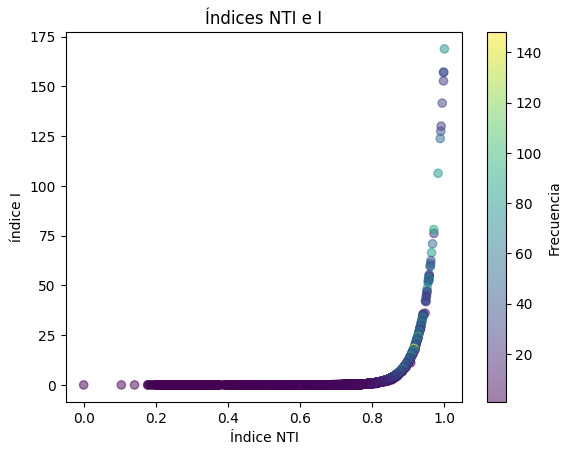

In [26]:
%matplotlib inline
# Estudiar relaciones entre índices

# NTI - I
plt.scatter(x=df_wIndices["index_NTI"],y=df_wIndices["I"], c=df_wIndices["Frecuencia"], alpha=0.5)
plt.colorbar(label='Frecuencia')
plt.title("Índices NTI e I")
plt.xlabel("Índice NTI")
plt.ylabel("índice I")
plt.show()

# Agrupamiento de clientes

Finalmente, clasifiquemos a los clienets.<br>
Como hicimos un índice que pretende resumir la información de los clienets, no cabe usar algoritmos de clasificación.<br>
Continuemos. Ya que $NTI \in [0, 1]$ podemos fijar los intervalos de los índices. <br>
Por una parte, dijar rangos responde a la realidad del negocio, como no la conocemos, vamos a clasificar a los clientes con un criterio discrecional.<br>
Por otra parte, agrupar según técnicas como cuantiles nos diría en en qué puntos se recoge un % de los clientes. El análisis dependerá de la utilidad, como el lector quizá saber mejor que yo.

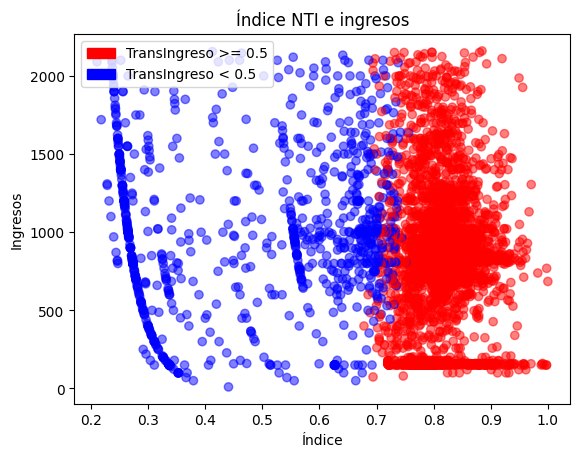

In [27]:
# Estudiemos una relaicón interesante: transaccionalidad/ingresos.
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Calcular el primer y tercer cuartil (Q1 y Q3)
Q1 = np.percentile(df_wIndices["Ingresos"], 25)
Q3 = np.percentile(df_wIndices["Ingresos"], 75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores que estén dentro del rango establecido
filtered_data = df_wIndices[(df_wIndices["Ingresos"] >= lower_bound) & (df_wIndices["Ingresos"] <= upper_bound) ]

# Definir los límites de los colores discretos
cmap = ListedColormap(['blue', 'red'])  # Dos colores: azul para <0.5, rojo para >=0.5

# Dibujar relación transacciones e ingreso
j = plt.scatter(x=filtered_data["index_NTI"],y=filtered_data["Ingresos"], c=filtered_data['TransIngreso'] >= 0.5, cmap=cmap, alpha = .5)
plt.title("Índice NTI e ingresos")
plt.xlabel("Índice")
plt.ylabel("Ingresos")

# Crear etiquetas para la leyenda
rojo_patch = mpatches.Patch(color='red', label='TransIngreso >= 0.5')
azul_patch = mpatches.Patch(color='blue', label='TransIngreso < 0.5')

# Mostrar la leyenda
plt.legend(handles=[rojo_patch, azul_patch])

plt.show()

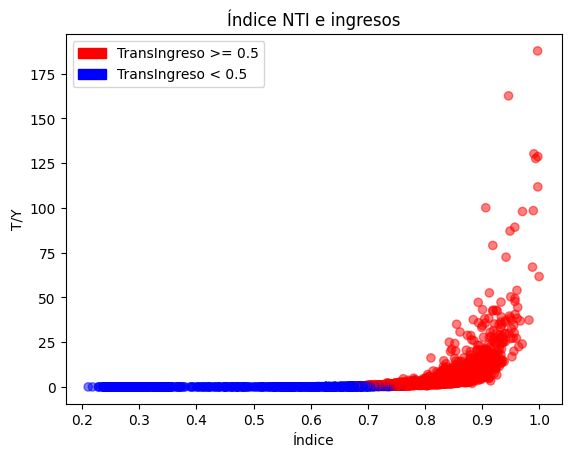

In [28]:
# Estudiemos una relaicón interesante: transaccionalidad/ingresos.
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Calcular el primer y tercer cuartil (Q1 y Q3)
Q1 = np.percentile(df_wIndices["Ingresos"], 25)
Q3 = np.percentile(df_wIndices["Ingresos"], 75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores que estén dentro del rango establecido
filtered_data = df_wIndices[(df_wIndices["Ingresos"] >= lower_bound) & (df_wIndices["Ingresos"] <= upper_bound) ]

# Definir los límites de los colores discretos
cmap = ListedColormap(['blue', 'red'])  # Dos colores: azul para <0.5, rojo para >=0.5

# Dibujar relación transacciones e ingreso
j = plt.scatter(x=filtered_data["index_NTI"],y=filtered_data["TransIngreso"], c=filtered_data['TransIngreso'] >= 0.5, cmap=cmap, alpha = .5)
plt.title("Índice NTI e ingresos")
plt.xlabel("Índice")
plt.ylabel("T/Y")

# Crear etiquetas para la leyenda
rojo_patch = mpatches.Patch(color='red', label='TransIngreso >= 0.5')
azul_patch = mpatches.Patch(color='blue', label='TransIngreso < 0.5')

# Mostrar la leyenda
plt.legend(handles=[rojo_patch, azul_patch])

plt.show()

In [29]:
# Vamos a elegir como rango sospechoso cuando el índice es:
corte = df_wIndices[df_wIndices["TransIngreso"]>=.5]["index_NTI"].min()
corte
# Ya que en este punto La relación T/Y es de al menos 1/2

0.6779940904798771

In [30]:
print(f'Rango 1: < %s' % (corte - 4/10))
print(f'Rango 2: De {corte - 4/10} a menos de  {corte - 2/10}')
print(f'Rango 3: De {corte - 2/10} a menos de  {corte}')
print(f'Rango 4: De {corte} a 1')


Rango 1: < 0.2779940904798771
Rango 2: De 0.2779940904798771 a menos de  0.4779940904798771
Rango 3: De 0.4779940904798771 a menos de  0.6779940904798771
Rango 4: De 0.6779940904798771 a 1


In [31]:
import pandas as pd
import numpy as np

# Definimos las condiciones
conditions = [
    (df_wIndices['index_NTI'] < corte - 4/10),
    (df_wIndices['index_NTI'] >= corte - 4/10) & (df_wIndices['index_NTI'] < corte - 2/10),
    (df_wIndices['index_NTI'] >= corte - 2/10) & (df_wIndices['index_NTI'] < corte),
    (df_wIndices['index_NTI'] >= corte) & (df_wIndices['index_NTI'] <= 1 ),
    (df_wIndices['index_NTI'].isna())
]

# Definimos los resultados
choices = ["baja", "moderada", "alta", "muy alta (sospechosa)", "no establecida"]

# Clasificar
df_clasificado = df_wIndices.assign(categoria=np.select(conditions, choices, default=1))
df_clasificado

,Frecuencia,Transaccionalidad,Ingresos,TransIngreso,numTransIngreso,index_NTI,I,categoria
4117,75.0,42227.97,684.77,61.667377,4625.053303,1.000000,168.808372,muy alta (sospechosa)
1962,34.0,98942.67,768.90,128.680804,4375.147327,0.997880,157.084939,muy alta (sospechosa)
3592,39.0,16763.67,150.00,111.757800,4358.554200,0.997735,157.097063,muy alta (sospechosa)
3685,23.0,28152.28,150.00,187.681867,4316.682933,0.997367,152.739627,muy alta (sospechosa)
3414,31.0,19138.09,150.00,127.587267,3955.205267,0.994029,141.590869,muy alta (sospechosa)
...,...,...,...,...,...,...,...,...
4955,1.0,0.09,0.00,NaN,NaN,NaN,NaN,no establecida
4959,1.0,0.31,0.00,NaN,NaN,NaN,NaN,no establecida
4982,2.0,19.71,0.00,NaN,NaN,NaN,NaN,no establecida
4989,12.0,2133.33,0.00,NaN,NaN,NaN,NaN,no establecida


In [32]:
df_clasificado['categoria'].value_counts()

muy alta (sospechosa)    3652
no establecida            450
alta                      409
moderada                  248
baja                      241
Name: categoria, dtype: int64